# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Library untuk Download & Ekstrak Data
import gdown
import zipfile
import os

# Library untuk Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Konfigurasi visualisasi
%matplotlib inline
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')

print("Semua Library berhasil di-import!")

Semua Library berhasil di-import!


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [3]:
file_id = '15afU0su_s4WMeX7nFKO5RiMQwsezW7KW'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'drinking_water.zip'
gdown.download(url, output, quiet=False)

with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall('dataset_air') # Mengekstrak ke folder 'dataset_air'

# File CSV ada di dalam folder hasil ekstrak
df = pd.read_csv('dataset_air/water_potability.csv')

# Tampilkan 5 baris pertama data
df.head()

Downloading...
From: https://drive.google.com/uc?id=15afU0su_s4WMeX7nFKO5RiMQwsezW7KW
To: /content/drinking_water.zip
100%|██████████| 257k/257k [00:00<00:00, 89.2MB/s]


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

Statistik Deskriptif:


,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000



Jumlah Missing Values per Kolom:
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


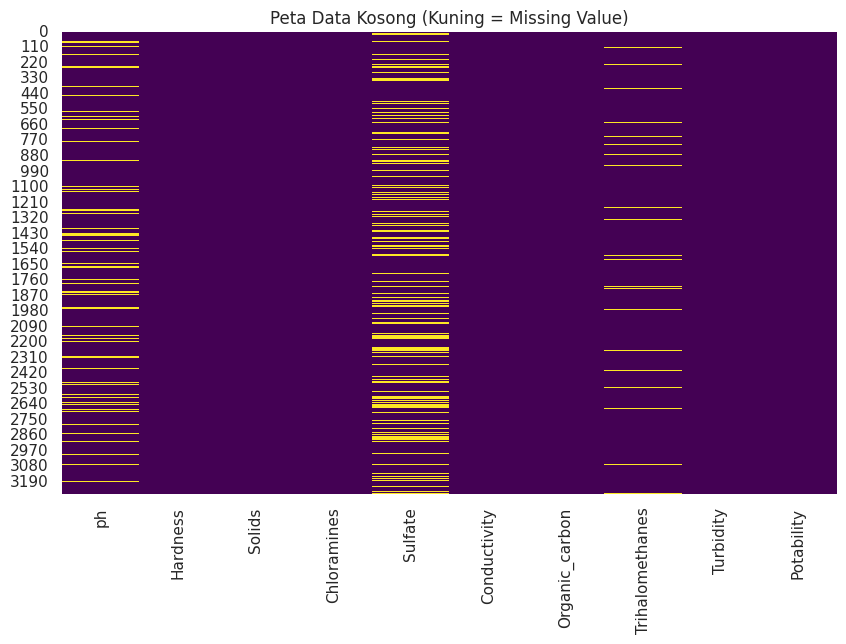

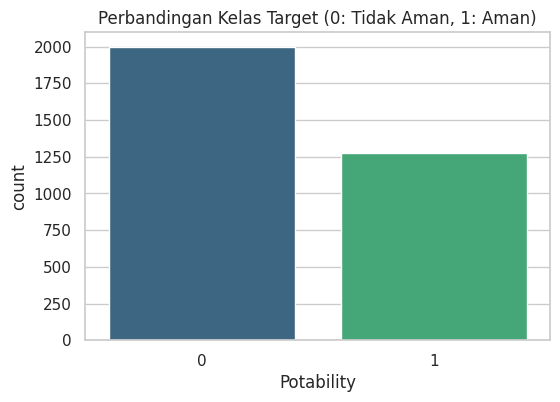

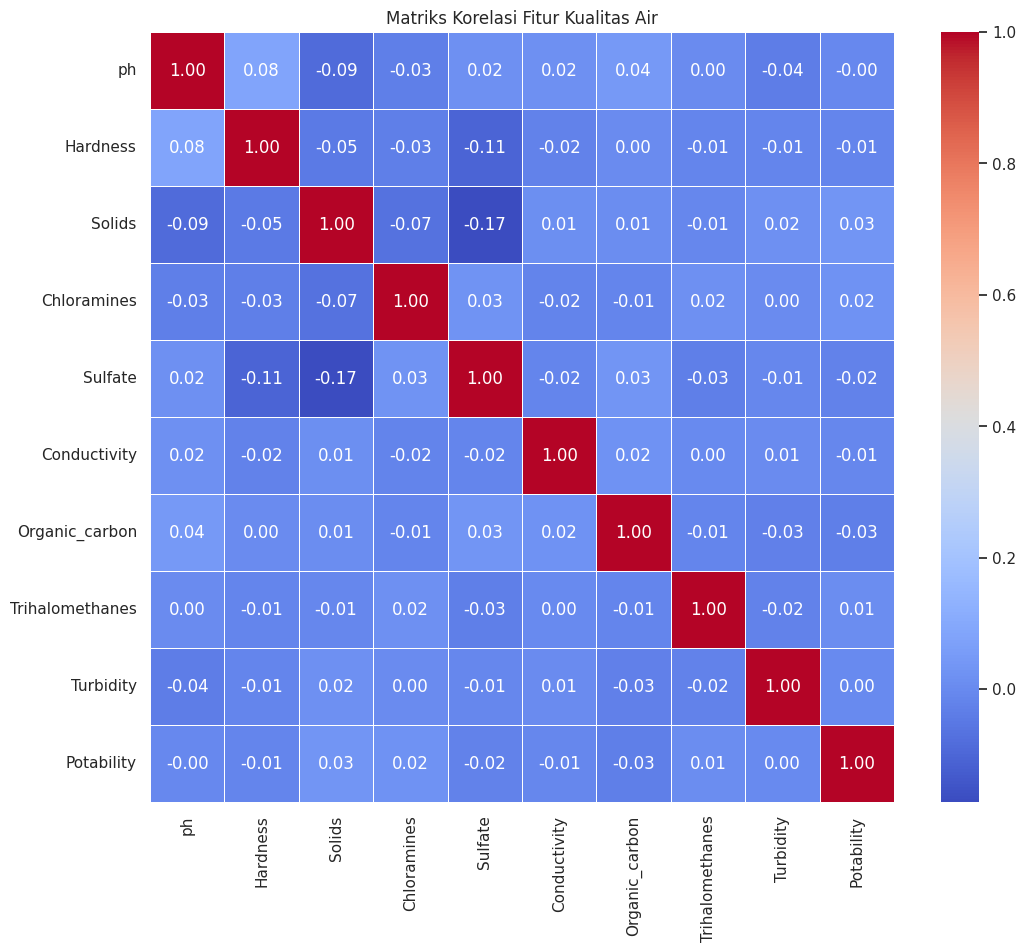

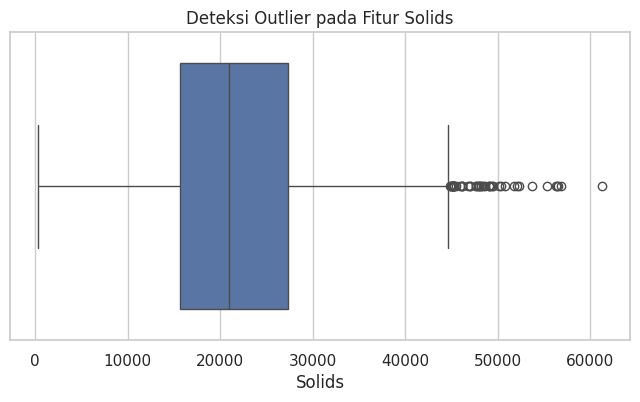

In [4]:
#Type your code here
# 1. Statistik Deskriptif
print("Statistik Deskriptif:")
display(df.describe().T)

# 2. Cek Missing Values
print("\nJumlah Missing Values per Kolom:")
print(df.isnull().sum())

# Visualisasi Missing Values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Peta Data Kosong (Kuning = Missing Value)')
plt.show()

# 3. Cek Keseimbangan Target
plt.figure(figsize=(6, 4))
sns.countplot(x='Potability', data=df, palette='viridis')
plt.title('Perbandingan Kelas Target (0: Tidak Aman, 1: Aman)')
plt.show()

# 4. Cek Korelasi Antar Fitur
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Matriks Korelasi Fitur Kualitas Air')
plt.show()

# 5. Cek Outlier dengan Boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Solids'])
plt.title('Deteksi Outlier pada Fitur Solids')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Handling Duplicates
print(f"Jumlah baris awal: {len(df)}")
df_clean = df.drop_duplicates()
print(f"Jumlah baris setelah drop duplikat: {len(df_clean)}")

# Handling Missing Values (Imputasi)
# Kita isi nilai NaN pada ph, Sulfate, dan Trihalomethanes dengan nilai rata-rata (mean)
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df_clean), columns=df_clean.columns)

# Cek ulang apakah masih ada missing values
print(f"Jumlah missing values setelah imputasi: {df_imputed.isnull().sum().sum()}")

# Split Features (X) & Target (y)
X = df_imputed.drop('Potability', axis=1)
y = df_imputed['Potability']

# Split Data Train & Test
# Kita pisahkan 20% data untuk testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling (Standarisasi)
# Mengubah skala data agar memiliki rata-rata 0 dan standar deviasi 1
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Kembalikan ke format DataFrame agar rapi
X_train_final = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_final = pd.DataFrame(X_test_scaled, columns=X.columns)

print("Preprocessing Selesai!")
print(f"Dimensi Train: {X_train_final.shape}")
print(f"Dimensi Test: {X_test_final.shape}")

# SIMPAN DATA UNTUK PROSES BERIKUTNYA
# Gabungkan kembali dengan target untuk disimpan ke CSV
# File ini yang nanti akan kamu pakai di script 'modelling.py'
train_set = X_train_final.copy()
train_set['Potability'] = y_train.reset_index(drop=True)

test_set = X_test_final.copy()
test_set['Potability'] = y_test.reset_index(drop=True)

train_set.to_csv('water_potability_train_clean.csv', index=False)
test_set.to_csv('water_potability_test_clean.csv', index=False)

print("\nFile 'water_potability_train_clean.csv' berhasil disimpan dan siap untuk training!")

Jumlah baris awal: 3276
Jumlah baris setelah drop duplikat: 3276
Jumlah missing values setelah imputasi: 0
Preprocessing Selesai!
Dimensi Train: (2620, 9)
Dimensi Test: (656, 9)

File 'water_potability_train_clean.csv' berhasil disimpan dan siap untuk training!
